## 讀取資料 (Default：Label Encoding)

In [ ]:
#讀取資料
import pandas as pd
import numpy as np
# plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df= pd.read_csv('crime_marijuana.csv')
#PO%：19.73%

In [ ]:
def clean_up(i_str):
    return i_str[:-1]

df.MJ_RELATION_TYPE = list(map(clean_up, df.MJ_RELATION_TYPE))

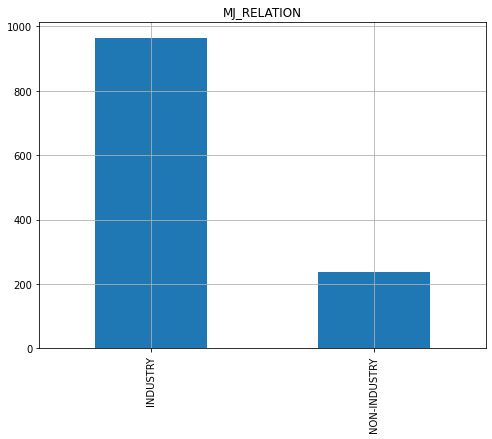

In [ ]:
plt.figure(figsize=(8,6))
df.MJ_RELATION_TYPE.value_counts().plot(kind='bar')
plt.title('MJ_RELATION')
plt.grid()
plt.show()

In [ ]:
# all columns
print(list(df.columns))

['INCIDENT_ID', 'FIRST_OCCURENCE_DATE', 'LAST_OCCURENCE_DATE', 'REPORTDATE', 'INCIDENT_ADDRESS', 'GEO_X', 'GEO_Y', 'DISTRICT_ID', 'PRECINCT_ID', 'OFFENSE_CODE', 'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'MJ_RELATION_TYPE', 'NEIGHBORHOOD_ID']


In [ ]:
# Label Emcoder，將部分字串轉數值
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

for col in df[['DISTRICT_ID','PRECINCT_ID','OFFENSE_CODE','MJ_RELATION_TYPE','NEIGHBORHOOD_ID']]:
    df[col]=le.fit_transform(df[col])

In [ ]:
#資料前處理 
df=df.dropna(axis=0) #有遺失值，即丟棄該樣本
y=df['MJ_RELATION_TYPE']#應變數

X=df.drop(columns='MJ_RELATION_TYPE') #丟棄應變數
X=X.drop(columns='OFFENSE_TYPE_ID') #與OFFENSE_CODE重複
X=X.drop(columns='OFFENSE_CATEGORY_ID') #與OFFENSE_CODE重複
X=X.drop(columns='INCIDENT_ID') #暫時不分析時間與編號
X=X.drop(columns='FIRST_OCCURENCE_DATE')
X=X.drop(columns='LAST_OCCURENCE_DATE')
X=X.drop(columns='REPORTDATE')
X=X.drop(columns='INCIDENT_ADDRESS')

In [ ]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1194    0
1195    1
1197    0
1198    0
1200    0
Name: MJ_RELATION_TYPE, Length: 862, dtype: int64

In [ ]:
X

,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,NEIGHBORHOOD_ID
0,3132526.0,1698468.0,0,3,40,52
1,3158749.0,1672408.0,2,15,17,61
2,3173094.0,1663993.0,2,18,15,29
3,3152054.0,1712498.0,1,7,15,22
4,3157004.0,1674967.0,2,13,15,19
...,...,...,...,...,...,...
1194,3136556.0,1692610.0,0,5,15,37
1195,3143939.0,1700198.0,5,30,52,23
1197,3156774.0,1712483.0,1,7,15,22
1198,3143321.0,1692796.0,5,30,15,14


In [ ]:
# 差補效果沒有較好
# Missing imputation
#from fancyimpute import KNN
#print(X, '\n')

# Use 3 nearest rows which have a feature to fill in each row's missing features
#imputer = KNN(k=3)

# row’s missing features
#X = imputer.fit_transform(X)
#print(X)

          GEO_X      GEO_Y  DISTRICT_ID  PRECINCT_ID  OFFENSE_CODE  \
0     3132526.0  1698468.0            0            3            40   
1     3158749.0  1672408.0            2           15            17   
2     3173094.0  1663993.0            2           18            15   
3     3152054.0  1712498.0            1            7            15   
4     3157004.0  1674967.0            2           13            15   
...         ...        ...          ...          ...           ...   
1196  3150981.0  1694664.0            5           33             2   
1197  3156774.0  1712483.0            1            7            15   
1198  3143321.0  1692796.0            5           30            15   
1199  3204743.0  1726098.0            4           28            32   
1200  3126994.0  1705528.0            0            0            15   

      NEIGHBORHOOD_ID  
0                  52  
1                  61  
2                  29  
3                  22  
4                  19  
...            

NameError: ignored

## P1：標準化是否影響結果

In [ ]:
#先不經標準化做XGBoost
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf1= XGBClassifier(**params)

# 5-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores1 = cross_val_score(clf1,X,y,cv=5,scoring='accuracy')
print(scores1)
print('Accuracy of XGBoost cross-vaild test:',scores1.mean())
# Accuracy of XGBoost cross-vaild test: 0.935065196935072

[0.9132948  0.93063584 0.94186047 0.94767442 0.94186047]
Accuracy of XGBoost cross-vaild test: 0.935065196935072


In [ ]:
#使用經過LabelEncoder編碼的特徵，標準化 (因為變數值間有大有小)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X)

In [ ]:
#標準化後XGBoost
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf11= XGBClassifier(**params)

# 5-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores11 = cross_val_score(clf11,X1,y,cv=5,scoring='accuracy')
print(scores11)
print('Accuracy of XGBoost cross-vaild test:',scores11.mean())

# Accuracy of XGBoost cross-vaild test: 0.9362212662992337
##標準化在XGBoost的交叉驗證上沒有差異太大

[0.9132948  0.93641618 0.94186047 0.94767442 0.94186047]
Accuracy of XGBoost cross-vaild test: 0.9362212662992337


## P2：One-hot Encoding vs. Label Encoding on Tree-based method

In [ ]:
# 清除 Label Encoder 後，再做 One Hot Encoding
df= pd.read_csv('crime_marijuana.csv')
df=df.dropna(axis=0) #有遺失值，即丟棄該樣本
y=df['MJ_RELATION_TYPE']#應變數

X=df.drop(columns='MJ_RELATION_TYPE') #丟棄應變數
X=X.drop(columns='OFFENSE_TYPE_ID') #與OFFENSE_CODE重複
X=X.drop(columns='OFFENSE_CATEGORY_ID') #與OFFENSE_CODE重複
X=X.drop(columns='INCIDENT_ID') #暫時不分析時間與編號
X=X.drop(columns='FIRST_OCCURENCE_DATE')
X=X.drop(columns='LAST_OCCURENCE_DATE')
X=X.drop(columns='REPORTDATE')
X=X.drop(columns='INCIDENT_ADDRESS')

X2 = pd.get_dummies(X)
pd.DataFrame(X2)

,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,NEIGHBORHOOD_ID_athmar-park,NEIGHBORHOOD_ID_auraria,NEIGHBORHOOD_ID_baker,NEIGHBORHOOD_ID_barnum,NEIGHBORHOOD_ID_barnum-west,...,NEIGHBORHOOD_ID_virginia-village,NEIGHBORHOOD_ID_washington-park,NEIGHBORHOOD_ID_washington-park-west,NEIGHBORHOOD_ID_washington-virginia-vale,NEIGHBORHOOD_ID_wellshire,NEIGHBORHOOD_ID_west-colfax,NEIGHBORHOOD_ID_west-highland,NEIGHBORHOOD_ID_westwood,NEIGHBORHOOD_ID_whittier,NEIGHBORHOOD_ID_windsor
0,3132526.0,1698468.0,1,121,3563,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3158749.0,1672408.0,3,314,2205,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3173094.0,1663993.0,3,323,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3152054.0,1712498.0,2,212,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3157004.0,1674967.0,3,312,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,3136556.0,1692610.0,1,123,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1195,3143939.0,1700198.0,6,611,7399,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197,3156774.0,1712483.0,2,212,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,3143321.0,1692796.0,6,611,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X2

,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,NEIGHBORHOOD_ID_athmar-park,NEIGHBORHOOD_ID_auraria,NEIGHBORHOOD_ID_baker,NEIGHBORHOOD_ID_barnum,NEIGHBORHOOD_ID_barnum-west,...,NEIGHBORHOOD_ID_virginia-village,NEIGHBORHOOD_ID_washington-park,NEIGHBORHOOD_ID_washington-park-west,NEIGHBORHOOD_ID_washington-virginia-vale,NEIGHBORHOOD_ID_wellshire,NEIGHBORHOOD_ID_west-colfax,NEIGHBORHOOD_ID_west-highland,NEIGHBORHOOD_ID_westwood,NEIGHBORHOOD_ID_whittier,NEIGHBORHOOD_ID_windsor
0,3132526.0,1698468.0,1,121,3563,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3158749.0,1672408.0,3,314,2205,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3173094.0,1663993.0,3,323,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3152054.0,1712498.0,2,212,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3157004.0,1674967.0,3,312,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,3136556.0,1692610.0,1,123,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1195,3143939.0,1700198.0,6,611,7399,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197,3156774.0,1712483.0,2,212,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,3143321.0,1692796.0,6,611,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# One hot encoding 後 XGBoost
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf2= XGBClassifier(**params)

# 5-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores2 = cross_val_score(clf2,X2,y,cv=5,scoring='accuracy')
print(scores2)
print('Accuracy of XGBoost cross-vaild test:',scores2.mean())

# Accuracy of XGBoost cross-vaild test for Label Encoder: 0.9362212662992337
# Accuracy of XGBoost cross-vaild test for one-hot encoding: 0.9420217771205808
# 交叉驗證為 Label Encoder 結果略佳
# 可能在 one-hot encoding 會陷入 curse of dimensionaility

[0.92485549 0.93641618 0.93604651 0.94767442 0.96511628]
Accuracy of XGBoost cross-vaild test: 0.9420217771205808


## P3：Feature Binning 有沒有效果

In [ ]:
import pandas as pd
import numpy as np
# For 繪製敘述統計
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import scipy.stats as stats
from sklearn.model_selection import train_test_split
# for discretization
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
df= pd.read_csv('crime_marijuana.csv')
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for col in df[['DISTRICT_ID','PRECINCT_ID','OFFENSE_CODE','MJ_RELATION_TYPE','NEIGHBORHOOD_ID']]:
    df[col]=le.fit_transform(df[col])
#資料前處理 
df=df.dropna(axis=0) #有遺失值，即丟棄該樣本
y=df['MJ_RELATION_TYPE']#應變數

X=df.drop(columns='MJ_RELATION_TYPE') #丟棄應變數
X=X.drop(columns='OFFENSE_TYPE_ID') #與OFFENSE_CODE重複
X=X.drop(columns='OFFENSE_CATEGORY_ID') #與OFFENSE_CODE重複
X=X.drop(columns='INCIDENT_ID') #暫時不分析時間與編號
X=X.drop(columns='FIRST_OCCURENCE_DATE')
X=X.drop(columns='LAST_OCCURENCE_DATE')
X=X.drop(columns='REPORTDATE')
X=X.drop(columns='INCIDENT_ADDRESS')

In [ ]:
# Equal width Binning
disc1 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
disc1.fit(X[['GEO_X']])
disc2 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
disc2.fit(X[['GEO_Y']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [ ]:
# Equal Frequency Binning
disc11 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
disc11.fit(X[['GEO_X']])
disc21 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
disc21.fit(X[['GEO_Y']])

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [ ]:
disc1.bin_edges_

array([array([3110151. , 3121403.5, 3132656. , 3143908.5, 3155161. , 3166413.5,
              3177666. , 3188918.5, 3200171. , 3211423.5, 3222676. ])          ],
      dtype=object)

In [ ]:
disc11.bin_edges_

array([array([3110151. , 3133615. , 3137179. , 3140708.6, 3142582.6, 3144286. ,
              3148592. , 3155576.9, 3160325. , 3169284. , 3222676. ])          ],
      dtype=object)

In [ ]:
X3[['GEO_X']]=disc1.transform(X[['GEO_X']])
X3[['GEO_Y']]=disc2.transform(X[['GEO_Y']])
X3 = pd.DataFrame(X3)

In [ ]:
# Binning 後進行 XGBoost
#X3=X3.drop(columns=['age',' fnlwgt',' capital-gain',' capital-loss',' hours-per-week']) #原先的特徵丟掉

from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf3= XGBClassifier(**params)

# 5-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores3 = cross_val_score(clf3,X3,y,cv=5,scoring='accuracy')
print(scores3)
print('Accuracy of XGBoost cross-vaild test:',scores3.mean())

#Accuracy of XGBoost cross-vaild test: 0.9304140341443743
# Frequency較佳

[0.9132948  0.93063584 0.93023256 0.95348837 0.9244186 ]
Accuracy of XGBoost cross-vaild test: 0.9304140341443743


In [ ]:
df= pd.read_csv('crime_marijuana.csv')
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for col in df[['DISTRICT_ID','PRECINCT_ID','OFFENSE_CODE','MJ_RELATION_TYPE','NEIGHBORHOOD_ID']]:
    df[col]=le.fit_transform(df[col])
#資料前處理 
df=df.dropna(axis=0) #有遺失值，即丟棄該樣本
y=df['MJ_RELATION_TYPE']#應變數

X=df.drop(columns='MJ_RELATION_TYPE') #丟棄應變數
X=X.drop(columns='OFFENSE_TYPE_ID') #與OFFENSE_CODE重複
X=X.drop(columns='OFFENSE_CATEGORY_ID') #與OFFENSE_CODE重複
X=X.drop(columns='INCIDENT_ID') #暫時不分析時間與編號
X=X.drop(columns='FIRST_OCCURENCE_DATE')
X=X.drop(columns='LAST_OCCURENCE_DATE')
X=X.drop(columns='REPORTDATE')
X=X.drop(columns='INCIDENT_ADDRESS')
X31 = pd.DataFrame(X) #inherit

X31[['GEO_X']]=disc11.transform(X[['GEO_X']])
X31[['GEO_Y']]=disc21.transform(X[['GEO_Y']])
X31 = pd.DataFrame(X31)

In [ ]:
X31

,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,NEIGHBORHOOD_ID
0,0.0,6.0,0,3,40,52
1,7.0,1.0,2,15,17,61
2,9.0,0.0,2,18,15,29
3,6.0,9.0,1,7,15,22
4,7.0,1.0,2,13,15,19
...,...,...,...,...,...,...
1194,1.0,5.0,0,5,15,37
1195,4.0,6.0,5,30,52,23
1197,7.0,9.0,1,7,15,22
1198,4.0,5.0,5,30,15,14


In [ ]:
# Binning 後進行 XGBoost
#X3=X3.drop(columns=['age',' fnlwgt',' capital-gain',' capital-loss',' hours-per-week']) #原先的特徵丟掉

from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf3= XGBClassifier(**params)

# 5-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores31 = cross_val_score(clf3,X31,y,cv=5,scoring='accuracy')
print(scores31)
print('Accuracy of XGBoost cross-vaild test:',scores31.mean())

#Accuracy of XGBoost cross-vaild test:  0.935065196935072
# Frequency較佳

[0.9132948  0.93063584 0.94186047 0.94767442 0.94186047]
Accuracy of XGBoost cross-vaild test: 0.935065196935072


Source：iT幫幫忙--Day12 - Feature Engineering -- 4. 分隔方法(Discretization),https://ithelp.ithome.com.tw/articles/10235726

## P4：Label Encoding

In [ ]:
# One hot encoding 後 XGBoost 
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf4= XGBClassifier(**params)

# 5-fold validation
scores4 = cross_val_score(clf4,X,y,cv=5,scoring='accuracy')
print(scores4)
print('Accuracy of XGBoost cross-vaild test:',scores4.mean())

# Accuracy of XGBoost cross-vaild test: 0.9408522650893938

[0.91907514 0.94797688 0.94186047 0.94186047 0.95348837]
Accuracy of XGBoost cross-vaild test: 0.9408522650893938


In [ ]:
# One hot encoding 後 RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
clf41=RF.fit(X,y)
scores41 = cross_val_score(clf41,X,y,cv=5,scoring='accuracy')
print(scores41)
print('Accuracy of RandomForest cross-vaild test:',scores41.mean())

# Accuracy of RandomForest cross-vaild test: 0.9327261728726979

[0.90751445 0.94797688 0.95348837 0.9127907  0.94186047]
Accuracy of RandomForest cross-vaild test: 0.9327261728726979


In [ ]:
# One hot encoding 後 Lightgbm
import lightgbm as lgb
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)
clf42=LGBM.fit(X,y)
scores42 = cross_val_score(clf42,X,y,cv=5,scoring='accuracy')
print(scores42)
print('Accuracy of Lightgbm cross-vaild test:',scores42.mean())

# Accuracy of Lightgbm cross-vaild test: 0.9373706143298831

/usr/local/lib/python3.8/dist-packages/lightgbm/__init__.py:30: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.8/dist-packages/lightgbm/VERSION.txt' mode='r' encoding='UTF-8'>
  __version__ = open(os.path.join(dir_path, 'VERSION.txt')).read().strip()


[0.9132948  0.94797688 0.94767442 0.93023256 0.94767442]
Accuracy of Lightgbm cross-vaild test: 0.9373706143298831


In [ ]:
# One hot encoding 後 MLP
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes = (256,128,64,32), activation="relu",max_iter=50, random_state=1)
clf43=MLP.fit(X,y)
scores43 = cross_val_score(clf43,X,y,cv=5,scoring='accuracy')
print(scores43)
print('Accuracy of MLP cross-vaild test:',scores43.mean())
# Accuracy of MLP cross-vaild test: 0.7034816507595107

[0.16763006 0.83815029 0.8372093  0.8372093  0.8372093 ]
Accuracy of MLP cross-vaild test: 0.7034816507595107


In [ ]:
# One hot encoding 後 SVM
from sklearn import svm
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score

svm = svm.SVC(kernel='rbf',max_iter=10000) #Default: rbf
clf44=svm.fit(X,y)
scores44 = cross_val_score(clf44,X,y,cv=5,scoring='accuracy')
print(scores44)
print('Accuracy of SVM cross-vaild test:',scores44.mean())
# Accuracy of SVM cross-vaild test: 0.8364296276381233

[0.83236994 0.83815029 0.8372093  0.8372093  0.8372093 ]
Accuracy of SVM cross-vaild test: 0.8364296276381233


## P4：One Hot Encoding

In [ ]:
# 清除 Label Encoder 後，再做 One Hot Encoding
df= pd.read_csv('crime_marijuana.csv')
df=df.dropna(axis=0) #有遺失值，即丟棄該樣本
y=df['MJ_RELATION_TYPE']#應變數

X=df.drop(columns='MJ_RELATION_TYPE') #丟棄應變數
X=X.drop(columns='OFFENSE_TYPE_ID') #與OFFENSE_CODE重複
X=X.drop(columns='OFFENSE_CATEGORY_ID') #與OFFENSE_CODE重複
X=X.drop(columns='INCIDENT_ID') #暫時不分析時間與編號
X=X.drop(columns='FIRST_OCCURENCE_DATE')
X=X.drop(columns='LAST_OCCURENCE_DATE')
X=X.drop(columns='REPORTDATE')
X=X.drop(columns='INCIDENT_ADDRESS')

X4a = pd.get_dummies(X)
pd.DataFrame(X4a)

,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,NEIGHBORHOOD_ID_athmar-park,NEIGHBORHOOD_ID_auraria,NEIGHBORHOOD_ID_baker,NEIGHBORHOOD_ID_barnum,NEIGHBORHOOD_ID_barnum-west,...,NEIGHBORHOOD_ID_virginia-village,NEIGHBORHOOD_ID_washington-park,NEIGHBORHOOD_ID_washington-park-west,NEIGHBORHOOD_ID_washington-virginia-vale,NEIGHBORHOOD_ID_wellshire,NEIGHBORHOOD_ID_west-colfax,NEIGHBORHOOD_ID_west-highland,NEIGHBORHOOD_ID_westwood,NEIGHBORHOOD_ID_whittier,NEIGHBORHOOD_ID_windsor
0,3132526.0,1698468.0,1,121,3563,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3158749.0,1672408.0,3,314,2205,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3173094.0,1663993.0,3,323,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3152054.0,1712498.0,2,212,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3157004.0,1674967.0,3,312,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,3136556.0,1692610.0,1,123,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1195,3143939.0,1700198.0,6,611,7399,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197,3156774.0,1712483.0,2,212,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,3143321.0,1692796.0,6,611,2203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# One hot encoding 後 XGBoost / 前處理在 P2
X4=X2 #inherit
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf4= XGBClassifier(**params)

# 5-fold validation
scores4a = cross_val_score(clf4,X4a,y,cv=5,scoring='accuracy')
print(scores4a)
print('Accuracy of XGBoost cross-vaild test:',scores4a.mean())
# Accuracy of XGBoost cross-vaild test: 0.9420217771205808

[0.92485549 0.93641618 0.93604651 0.94767442 0.96511628]
Accuracy of XGBoost cross-vaild test: 0.9420217771205808


In [ ]:
# One hot encoding 後 RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
clf41=RF.fit(X4a,y)
scores41a = cross_val_score(clf41,X4a,y,cv=5,scoring='accuracy')
print(scores41a)
print('Accuracy of RandomForest cross-vaild test:',scores41a.mean())

# Accuracy of RandomForest cross-vaild test: 0.9223215485952412

[0.89017341 0.9132948  0.93604651 0.9244186  0.94767442]
Accuracy of RandomForest cross-vaild test: 0.9223215485952412


In [ ]:
# One hot encoding 後 Lightgbm
import lightgbm as lgb
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)
clf42=LGBM.fit(X4a,y)
scores42a = cross_val_score(clf42,X4a,y,cv=5,scoring='accuracy')
print(scores42a)
print('Accuracy of Lightgbm cross-vaild test:',scores42a.mean())

# Accuracy of Lightgbm cross-vaild test: 0.9362212662992337

[0.90751445 0.94219653 0.93604651 0.94186047 0.95348837]
Accuracy of Lightgbm cross-vaild test: 0.9362212662992337


In [ ]:
# One hot encoding 後 MLP
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes = (256,128,64,32), activation="relu",max_iter=50, random_state=1)
clf43=MLP.fit(X4a,y)
scores43a = cross_val_score(clf43,X4a,y,cv=5,scoring='accuracy')
print(scores43a)
print('Accuracy of MLP cross-vaild test:',scores43a.mean())
# Accuracy of MLP cross-vaild test: 0.8364296276381233

[0.83236994 0.83815029 0.8372093  0.8372093  0.8372093 ]
Accuracy of MLP cross-vaild test: 0.8364296276381233


In [ ]:
# One hot encoding 後 SVM
from sklearn import svm
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score

svm = svm.SVC(kernel='rbf',max_iter=10000) #Default: rbf
clf44=svm.fit(X4a,y)
scores44a = cross_val_score(clf44,X4a,y,cv=5,scoring='accuracy')
print(scores44a)
print('Accuracy of SVM cross-vaild test:',scores44a.mean())
# Accuracy of SVM cross-vaild test for one-hot encoding: 0.8364296276381233

[0.83236994 0.83815029 0.8372093  0.8372093  0.8372093 ]
Accuracy of SVM cross-vaild test: 0.8364296276381233


## P4：Frequency Encoding

In [ ]:
# Frequency encoding：用類別出現頻率當作該類別數值
# 清除 Label Encoder
# 類別特徵：workclass, marital-status, occupation, relationship, race, sex, native-country
df=df.dropna(axis=0) #有遺失值，即丟棄該樣本
y=df['MJ_RELATION_TYPE']#應變數

X=df.drop(columns='MJ_RELATION_TYPE') #丟棄應變數
X=X.drop(columns='OFFENSE_TYPE_ID') #與OFFENSE_CODE重複
X=X.drop(columns='OFFENSE_CATEGORY_ID') #與OFFENSE_CODE重複
X=X.drop(columns='INCIDENT_ID') #暫時不分析時間與編號
X=X.drop(columns='FIRST_OCCURENCE_DATE')
X=X.drop(columns='LAST_OCCURENCE_DATE')
X=X.drop(columns='REPORTDATE')
X=X.drop(columns='INCIDENT_ADDRESS')

X4b=pd.DataFrame(X)
X4b

,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,NEIGHBORHOOD_ID
0,3132526.0,1698468.0,1,121,3563,sloan-lake
1,3158749.0,1672408.0,3,314,2205,university-hills
2,3173094.0,1663993.0,3,323,2203,hampden
3,3152054.0,1712498.0,2,212,2203,elyria-swansea
4,3157004.0,1674967.0,3,312,2203,cory-merrill
...,...,...,...,...,...,...
1194,3136556.0,1692610.0,1,123,2203,lincoln-park
1195,3143939.0,1700198.0,6,611,7399,five-points
1197,3156774.0,1712483.0,2,212,2203,elyria-swansea
1198,3143321.0,1692796.0,6,611,2203,civic-center


In [ ]:
encwork=X4b['DISTRICT_ID'].value_counts()
X4b['DISTRICT_ID']=X4b['DISTRICT_ID'].apply(lambda x : encwork[x]) 

encmarry=X4b['PRECINCT_ID'].value_counts()
X4b['PRECINCT_ID']=X4b['PRECINCT_ID'].apply(lambda x : encmarry[x])

encrel=X4b['OFFENSE_CODE'].value_counts()
X4b['OFFENSE_CODE']=X4b['OFFENSE_CODE'].apply(lambda x : encrel[x])

encrace=X4b['NEIGHBORHOOD_ID'].value_counts()
X4b['NEIGHBORHOOD_ID']=X4b['NEIGHBORHOOD_ID'].apply(lambda x : encrace[x]) 

In [ ]:
X4b

,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,NEIGHBORHOOD_ID
0,3132526.0,1698468.0,152,14,1,8
1,3158749.0,1672408.0,243,15,20,8
2,3173094.0,1663993.0,243,20,567,14
3,3152054.0,1712498.0,207,81,567,84
4,3157004.0,1674967.0,243,15,567,3
...,...,...,...,...,...,...
1194,3136556.0,1692610.0,152,38,567,34
1195,3143939.0,1700198.0,40,5,1,29
1197,3156774.0,1712483.0,207,81,567,84
1198,3143321.0,1692796.0,40,5,567,2


In [ ]:
# Frequency encoding 後 XGBoost / 前處理在 P2
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf4b= XGBClassifier(**params)

# 5-fold validation
scores4b = cross_val_score(clf4b,X4b,y,cv=5,scoring='accuracy')
print(scores4b)
print('Accuracy of XGBoost cross-vaild test:',scores4b.mean())

# Accuracy of XGBoost cross-vaild test: 0.936194380965183

[0.91907514 0.95375723 0.93604651 0.9244186  0.94767442]
Accuracy of XGBoost cross-vaild test: 0.9361943809651836


In [ ]:
# Frequency encoding 後 RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
clf41b=RF.fit(X4b,y)
scores41b = cross_val_score(clf41b,X4b,y,cv=5,scoring='accuracy')
print(scores41b)
print('Accuracy of RandomForest cross-vaild test:',scores41b.mean())

# Accuracy of RandomForest cross-vaild test: 0.9315633821750235

[0.9132948  0.94219653 0.94186047 0.9244186  0.93604651]
Accuracy of RandomForest cross-vaild test: 0.9315633821750235


In [ ]:
# Frequency encoding 後 Lightgbm
import lightgbm as lgb
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)
clf42b=LGBM.fit(X4b,y)
scores42b = cross_val_score(clf42b,X4b,y,cv=5,scoring='accuracy')
print(scores42b)
print('Accuracy of Lightgbm cross-vaild test:',scores42b.mean())
# Accuracy of Lightgbm cross-vaild test: 0.9408321010888561

[0.92485549 0.95953757 0.94186047 0.93604651 0.94186047]
Accuracy of Lightgbm cross-vaild test: 0.9408321010888561


In [ ]:
# Frequency encoding 後 MLP
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes = (256,128,64,32), activation="relu",max_iter=50, random_state=1)
clf43b=MLP.fit(X4b,y)
scores43b = cross_val_score(clf43b,X4b,y,cv=5,scoring='accuracy')
print(scores43b)
print('Accuracy of MLP cross-vaild test:',scores43b.mean())
# Accuracy of MLP cross-vaild test: 0.8364296276381233

[0.83236994 0.83815029 0.8372093  0.8372093  0.8372093 ]
Accuracy of MLP cross-vaild test: 0.8364296276381233


In [ ]:
# Frequency encoding 後 SVM
from sklearn import svm
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score

svm = svm.SVC(kernel='rbf',max_iter=10000) #Default: rbf
clf44b=svm.fit(X4b,y)
scores44b = cross_val_score(clf44b,X4b,y,cv=5,scoring='accuracy')
print(scores44b)
print('Accuracy of SVM cross-vaild test:',scores44b.mean())
# Accuracy of SVM cross-vaild test for one-hot encoding: 0.8364296276381233

[0.83236994 0.83815029 0.8372093  0.8372093  0.8372093 ]
Accuracy of SVM cross-vaild test: 0.8364296276381233


## P4：Target Encoding

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 4.5 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/google/colab/_pip.py:83: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.8/dist-packages/category_encoders-2.5.1.post0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [ ]:
# Target encoding：使用 Target (預測目標) 來達成 Features 的 Encoding
# 清除 Label Encoder
# 類別特徵：workclass, marital-status, occupation, relationship, race, sex, native-country
from category_encoders import *

enc = TargetEncoder(cols=['DISTRICT_ID','PRECINCT_ID','OFFENSE_CODE','NEIGHBORHOOD_ID'],
                    min_samples_leaf=20, smoothing=10).fit(X, y)
X4c = enc.transform(X)

In [ ]:
X4c

,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,NEIGHBORHOOD_ID
0,3132526.0,1698468.0,0.177632,0.333404,0.163573,0.328251
1,3158749.0,1672408.0,0.102881,0.177326,0.081787,0.125710
2,3173094.0,1663993.0,0.102881,0.156787,0.003527,0.156233
3,3152054.0,1712498.0,0.149758,0.086592,0.003527,0.071581
4,3157004.0,1674967.0,0.102881,0.177326,0.003527,0.189795
...,...,...,...,...,...,...
1194,3136556.0,1692610.0,0.177632,0.181283,0.003527,0.126732
1195,3143939.0,1700198.0,0.547977,0.243188,0.163573,0.218889
1197,3156774.0,1712483.0,0.149758,0.086592,0.003527,0.071581
1198,3143321.0,1692796.0,0.547977,0.243188,0.003527,0.140370


In [ ]:
# Target encoding 後 XGBoost / 前處理在 P2
from xgboost import XGBClassifier

params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf4= XGBClassifier(**params)

# 5-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores4c = cross_val_score(clf4,X4c,y,cv=5,scoring='accuracy')
print(scores4c)
print('Accuracy of XGBoost cross-vaild test:',scores4c.mean())

# Accuracy of XGBoost cross-vaild test: 0.9512770533673882

[0.93641618 0.96531792 0.95930233 0.94186047 0.95348837]
Accuracy of XGBoost cross-vaild test: 0.9512770533673882


In [ ]:
# One hot encoding 後 RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
clf41=RF.fit(X4c,y)
scores41c = cross_val_score(clf41,X4c,y,cv=5,scoring='accuracy')
print(scores41c)
print('Accuracy of RandomForest cross-vaild test:',scores41c.mean())

# Accuracy of RandomForest cross-vaild test for target encoding: 0.8591567243513352

[0.94219653 0.97109827 0.94186047 0.95348837 0.95930233]
Accuracy of RandomForest cross-vaild test: 0.9535891920957118


In [ ]:
# One hot encoding 後 Lightgbm
import lightgbm as lgb
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)
clf42=LGBM.fit(X4c,y)
scores42c = cross_val_score(clf42,X4c,y,cv=5,scoring='accuracy')
print(scores42c)
print('Accuracy of Lightgbm cross-vaild test:',scores42c.mean())
# Accuracy of Lightgbm cross-vaild test: 0.9454765425460412
# Accuracy of Lightgbm cross-vaild test for target encoding: 0.8740826747563275

[0.93063584 0.95953757 0.93604651 0.94186047 0.95930233]
Accuracy of Lightgbm cross-vaild test: 0.9454765425460412


In [ ]:
# One hot encoding 後 MLP
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes = (256,128,64,32), activation="relu",max_iter=50, random_state=1)
clf43=MLP.fit(X4c,y)
scores43c = cross_val_score(clf43,X4c,y,cv=5,scoring='accuracy')
print(scores43c)
print('Accuracy of MLP cross-vaild test:',scores43c.mean())
# Accuracy of MLP cross-vaild test: 0.5685979298292781 

[0.16763006 0.83815029 0.8372093  0.8372093  0.1627907 ]
Accuracy of MLP cross-vaild test: 0.5685979298292781


In [ ]:
# One hot encoding 後 SVM
from sklearn import svm
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score

svm = svm.SVC(kernel='rbf',max_iter=10000) #Default: rbf
clf44=svm.fit(X4c,y)
scores44c = cross_val_score(clf44,X4c,y,cv=5,scoring='accuracy')
print(scores44c)
print('Accuracy of SVM cross-vaild test:',scores44c.mean())
# Accuracy of SVM cross-vaild test: 0.8364296276381233

[0.83236994 0.83815029 0.8372093  0.8372093  0.8372093 ]
Accuracy of SVM cross-vaild test: 0.8364296276381233


## P4：Beta Target Encoding (擱置)

In [ ]:
# One hot encoding 後 XGBoost / 前處理在 P2
X4=X2 #inherit
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf4= XGBClassifier(**params)

# 5-fold validation
scores4 = cross_val_score(clf4,X4,y,cv=5,scoring='accuracy')
print(scores4)
print('Accuracy of XGBoost cross-vaild test:',scores4.mean())

# Accuracy of XGBoost cross-vaild test for one-hot encoding: 0.8605081039961279

[0.85613389 0.85749386 0.86394349 0.86578624 0.85918305]
Accuracy of XGBoost cross-vaild test: 0.8605081039961279


In [ ]:
# One hot encoding 後 RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
clf41=RF.fit(X4,y)
scores41 = cross_val_score(clf41,X4,y,cv=5,scoring='accuracy')
print(scores41)
print('Accuracy of RandomForest cross-vaild test:',scores41.mean())

# Accuracy of RandomForest cross-vaild test for one-hot encoding: 0.8537207195889831

[0.85337018 0.8470516  0.85304054 0.85749386 0.85764742]
Accuracy of RandomForest cross-vaild test: 0.8537207195889831


In [ ]:
# One hot encoding 後 Lightgbm
import lightgbm as lgb
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)
clf42=LGBM.fit(X4,y)
scores42 = cross_val_score(clf42,X4,y,cv=5,scoring='accuracy')
print(scores42)
print('Accuracy of Lightgbm cross-vaild test:',scores42.mean())
# Accuracy of Lightgbm cross-vaild test for one-hot encoding: 0.8741748264951859

[0.86764932 0.87315725 0.87423219 0.87776413 0.87807125]
Accuracy of Lightgbm cross-vaild test: 0.8741748264951859


In [ ]:
# One hot encoding 後 MLP
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes = (256,128,64,32), activation="relu",max_iter=50, random_state=1)
clf43=MLP.fit(X4,y)
scores43 = cross_val_score(clf43,X4,y,cv=5,scoring='accuracy')
print(scores43)
print('Accuracy of MLP cross-vaild test:',scores43.mean())
# Accuracy of MLP cross-vaild test for one-hot encoding: 0.7891032997320423

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.79656072 0.77902334 0.79499386 0.77134521 0.80359337]
Accuracy of Lightgbm cross-vaild test: 0.7891032997320423


In [ ]:
# One hot encoding 後 SVM
from sklearn import svm
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score

svm = svm.SVC(kernel='rbf',max_iter=10000) #Default: rbf
clf44=svm.fit(X4,y)
scores44 = cross_val_score(clf44,X4,y,cv=5,scoring='accuracy')
print(scores44)
print('Accuracy of SVM cross-vaild test:',scores44.mean())
# Accuracy of SVM cross-vaild test for one-hot encoding:

[0.79548595 0.79376536 0.79468673 0.79637592 0.79422604]
Accuracy of Lightgbm cross-vaild test: 0.7949080010457257


## P4：Leave-One-Out Encoding

In [ ]:
encc = LeaveOneOutEncoder(cols=['DISTRICT_ID','PRECINCT_ID','OFFENSE_CODE','NEIGHBORHOOD_ID'],sigma=0.05).fit(X, y)
X4d = encc.transform(X)

Source：http://contrib.scikit-learn.org/category_encoders/leaveoneout.html 

In [ ]:
# One hot encoding 後 XGBoost
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf4= XGBClassifier(**params)

# 5-fold validation
scores4d = cross_val_score(clf4,X4d,y,cv=5,scoring='accuracy')
print(scores4d)
print('Accuracy of XGBoost cross-vaild test:',scores4d.mean())

# Accuracy of XGBoost cross-vaild test for LOO encoding:  0.9466258905766904

[0.93641618 0.96531792 0.94186047 0.93604651 0.95348837]
Accuracy of XGBoost cross-vaild test: 0.9466258905766904


In [ ]:
# One hot encoding 後 RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
clf41=RF.fit(X4d,y)
scores41d = cross_val_score(clf41,X4d,y,cv=5,scoring='accuracy')
print(scores41d)
print('Accuracy of RandomForest cross-vaild test:',scores41d.mean())

# Accuracy of RandomForest cross-vaild test: 0.9559214948245731

[0.93641618 0.97109827 0.95930233 0.95348837 0.95930233]
Accuracy of RandomForest cross-vaild test: 0.9559214948245731


In [ ]:
# One hot encoding 後 Lightgbm
import lightgbm as lgb
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)
clf42=LGBM.fit(X4d,y)
scores42d = cross_val_score(clf42,X4d,y,cv=5,scoring='accuracy')
print(scores42d)
print('Accuracy of Lightgbm cross-vaild test:',scores42d.mean())
# Accuracy of Lightgbm cross-vaild test: 0.9454899852130663

[0.91907514 0.95953757 0.94767442 0.93604651 0.96511628]
Accuracy of Lightgbm cross-vaild test: 0.9454899852130663


In [ ]:
# One hot encoding 後 MLP
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes = (256,128,64,32), activation="relu",max_iter=50, random_state=1)
clf43=MLP.fit(X4d,y)
scores43d = cross_val_score(clf43,X4d,y,cv=5,scoring='accuracy')
print(scores43d)
print('Accuracy of MLP cross-vaild test:',scores43d.mean())
# Accuracy of MLP cross-vaild test: 0.5685979298292781

[0.16763006 0.83815029 0.8372093  0.8372093  0.1627907 ]
Accuracy of MLP cross-vaild test: 0.5685979298292781


In [ ]:
# One hot encoding 後 SVM
from sklearn import svm
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score

svm = svm.SVC(kernel='rbf',max_iter=10000) #Default: rbf
clf44=svm.fit(X4d,y)
scores44d = cross_val_score(clf44,X4d,y,cv=5,scoring='accuracy')
print(scores44d)
print('Accuracy of SVM cross-vaild test:',scores44d.mean())
# Accuracy of SVM cross-vaild test: 0.8364296276381233

[0.83236994 0.83815029 0.8372093  0.8372093  0.8372093 ]
Accuracy of SVM cross-vaild test: 0.8364296276381233


## P5：Combinations of numerical and categorical feature transformation

挑選較常用的六個組合

In [ ]:
# Standardization *  Label Encoding
import pandas as pd
import numpy as np
df= pd.read_csv('crime_marijuana.csv')

# Label Emcoder，將部分字串轉數值
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for col in df[['DISTRICT_ID','PRECINCT_ID','OFFENSE_CODE','MJ_RELATION_TYPE','NEIGHBORHOOD_ID']]:
    df[col]=le.fit_transform(df[col])

df=df.dropna(axis=0) #有遺失值，即丟棄該樣本
y=df['MJ_RELATION_TYPE']#應變數

X=df.drop(columns='MJ_RELATION_TYPE') #丟棄應變數
X=X.drop(columns='OFFENSE_TYPE_ID') #與OFFENSE_CODE重複
X=X.drop(columns='OFFENSE_CATEGORY_ID') #與OFFENSE_CODE重複
X=X.drop(columns='INCIDENT_ID') #暫時不分析時間與編號
X=X.drop(columns='FIRST_OCCURENCE_DATE')
X=X.drop(columns='LAST_OCCURENCE_DATE')
X=X.drop(columns='REPORTDATE')
X=X.drop(columns='INCIDENT_ADDRESS')

#StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X5 = sc.fit_transform(X)

In [ ]:
#XGBoost 
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf5= XGBClassifier(**params)

# 5-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores5 = cross_val_score(clf5,X5,y,cv=5,scoring='accuracy')
print(scores5)
print('Accuracy of XGBoost cross-vaild test:',scores5.mean())

# Accuracy of XGBoost cross-vaild test: 0.9420083344535556

[0.91907514 0.95375723 0.94186047 0.94186047 0.95348837]
Accuracy of XGBoost cross-vaild test: 0.9420083344535556


In [ ]:
# Standardization *  LOO
from category_encoders import *
encc = LeaveOneOutEncoder(cols=['DISTRICT_ID','PRECINCT_ID','OFFENSE_CODE','NEIGHBORHOOD_ID'],sigma=0.05).fit(X, y)
X5a = encc.transform(X)

#StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X5a = sc.fit_transform(X5a)

In [ ]:
#XGBoost 
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf5= XGBClassifier(**params)

# 5-fold validation
scores5a = cross_val_score(clf5,X5a,y,cv=5,scoring='accuracy')
print(scores5a)
print('Accuracy of XGBoost cross-vaild test:',scores5a.mean())

# Accuracy of XGBoost cross-vaild test: 0.9466258905766904

[0.93641618 0.96531792 0.94186047 0.93604651 0.95348837]
Accuracy of XGBoost cross-vaild test: 0.9466258905766904


In [ ]:
# Standardization *  Target Encoding
enc = TargetEncoder(cols=['DISTRICT_ID','PRECINCT_ID','OFFENSE_CODE','NEIGHBORHOOD_ID'],min_samples_leaf=20, smoothing=10).fit(X, y)
X5b = enc.transform(X)

#StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X5b = sc.fit_transform(X5b)

In [ ]:
#XGBoost 
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf5= XGBClassifier(**params)

# 5-fold validation
scores5b = cross_val_score(clf5,X5b,y,cv=5,scoring='accuracy')
print(scores5b)
print('Accuracy of XGBoost cross-vaild test:',scores5b.mean())

# Accuracy of XGBoost cross-vaild test: 0.9512770533673882

[0.93641618 0.96531792 0.95930233 0.94186047 0.95348837]
Accuracy of XGBoost cross-vaild test: 0.9512770533673882


In [ ]:
# Equal‐Frequency Binning *  Label Encoding
from sklearn.preprocessing import KBinsDiscretizer
disc11 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
disc11.fit(X[['GEO_X']])
disc21 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
disc21.fit(X[['GEO_Y']])

X5c = pd.DataFrame(X) #inherit
X5c[['GEO_X']]=disc11.transform(X5c[['GEO_X']])
X5c[['GEO_Y']]=disc21.transform(X5c[['GEO_Y']])
X5c = pd.DataFrame(X5c)

In [ ]:
X5c

,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,NEIGHBORHOOD_ID
0,0.0,6.0,0,3,40,52
1,7.0,1.0,2,15,17,61
2,9.0,0.0,2,18,15,29
3,6.0,9.0,1,7,15,22
4,7.0,1.0,2,13,15,19
...,...,...,...,...,...,...
1194,1.0,5.0,0,5,15,37
1195,4.0,6.0,5,30,52,23
1197,7.0,9.0,1,7,15,22
1198,4.0,5.0,5,30,15,14


In [ ]:
#XGBoost 
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf5= XGBClassifier(**params)

# 5-fold validation
scores5c = cross_val_score(clf5,X5c,y,cv=5,scoring='accuracy')
print(scores5c)
print('Accuracy of XGBoost cross-vaild test:',scores5c.mean())

# Accuracy of XGBoost cross-vaild test: 0.935065196935072

[0.9132948  0.93063584 0.94186047 0.94767442 0.94186047]
Accuracy of XGBoost cross-vaild test: 0.935065196935072


In [ ]:
# Equal‐Frequency Binning * Leave‐One‐Out Encoding
encc = LeaveOneOutEncoder(cols=['DISTRICT_ID','PRECINCT_ID','OFFENSE_CODE','NEIGHBORHOOD_ID'],sigma=0.05).fit(X5c, y)
X5d = encc.transform(X5c)

In [ ]:
X5d

,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,NEIGHBORHOOD_ID
0,0.0,6.0,0.177632,0.642857,0.163573,0.875000
1,7.0,1.0,0.102881,0.200000,0.000000,0.000000
2,9.0,0.0,0.102881,0.150000,0.003527,0.142857
3,6.0,9.0,0.149758,0.086420,0.003527,0.071429
4,7.0,1.0,0.102881,0.200000,0.003527,0.333333
...,...,...,...,...,...,...
1194,1.0,5.0,0.177632,0.184211,0.003527,0.117647
1195,4.0,6.0,0.600000,0.600000,0.163573,0.241379
1197,7.0,9.0,0.149758,0.086420,0.003527,0.071429
1198,4.0,5.0,0.600000,0.600000,0.003527,0.000000


In [ ]:
#XGBoost 
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf5= XGBClassifier(**params)

# 5-fold validation
scores5d = cross_val_score(clf5,X5d,y,cv=5,scoring='accuracy')
print(scores5d)
print('Accuracy of XGBoost cross-vaild test:',scores5d.mean())

# Accuracy of XGBoost cross-vaild test: 0.9408522650893938

[0.9132948  0.95375723 0.94767442 0.94186047 0.94767442]
Accuracy of XGBoost cross-vaild test: 0.9408522650893938


In [ ]:
# Equal‐Frequency Binning * Target Encoding
enc = TargetEncoder(cols=['DISTRICT_ID','PRECINCT_ID','OFFENSE_CODE','NEIGHBORHOOD_ID'],min_samples_leaf=20, smoothing=10).fit(X5c, y)
X5e = enc.transform(X5c)

In [ ]:
#XGBoost 
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf5= XGBClassifier(**params)

# 5-fold validation
scores5e = cross_val_score(clf5,X5e,y,cv=5,scoring='accuracy')
print(scores5e)
print('Accuracy of XGBoost cross-vaild test:',scores5e.mean())

# Accuracy of XGBoost cross-vaild test: 0.9420083344535556

[0.9132948  0.95953757 0.94767442 0.94767442 0.94186047]
Accuracy of XGBoost cross-vaild test: 0.9420083344535556


Standard Scalar 效果較佳，且 Label Encoder 效果又較 Target Encoding, LOO 佳

## P6：Categorical values of a feature is high (超過20種)

這邊為 native country 共有 42種類別，所以將其進行 encoding，所有 label encoder 的結果視為 baseline

In [ ]:
# Standardization *  Label Encoding
import pandas as pd
import numpy as np
df= pd.read_csv('crime_marijuana.csv')

# Label Emcoder，將部分字串轉數值
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for col in df[['DISTRICT_ID','PRECINCT_ID','OFFENSE_CODE','MJ_RELATION_TYPE','NEIGHBORHOOD_ID']]:
    df[col]=le.fit_transform(df[col])

df=df.dropna(axis=0) #有遺失值，即丟棄該樣本
y=df['MJ_RELATION_TYPE']#應變數

X=df.drop(columns='MJ_RELATION_TYPE') #丟棄應變數
X=X.drop(columns='OFFENSE_TYPE_ID') #與OFFENSE_CODE重複
X=X.drop(columns='OFFENSE_CATEGORY_ID') #與OFFENSE_CODE重複
X=X.drop(columns='INCIDENT_ID') #暫時不分析時間與編號
X=X.drop(columns='FIRST_OCCURENCE_DATE')
X=X.drop(columns='LAST_OCCURENCE_DATE')
X=X.drop(columns='REPORTDATE')
X=X.drop(columns='INCIDENT_ADDRESS')

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 6.2 MB/s eta 0:00:00


In [ ]:
# One Hot Encoder
from category_encoders import * 
enc6 = OneHotEncoder(cols=['OFFENSE_CODE','NEIGHBORHOOD_ID']).fit(X,y)
X6 = enc6.transform(X)

In [ ]:
X6

,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE_1,OFFENSE_CODE_2,OFFENSE_CODE_3,OFFENSE_CODE_4,OFFENSE_CODE_5,OFFENSE_CODE_6,...,NEIGHBORHOOD_ID_64,NEIGHBORHOOD_ID_65,NEIGHBORHOOD_ID_66,NEIGHBORHOOD_ID_67,NEIGHBORHOOD_ID_68,NEIGHBORHOOD_ID_69,NEIGHBORHOOD_ID_70,NEIGHBORHOOD_ID_71,NEIGHBORHOOD_ID_72,NEIGHBORHOOD_ID_73
0,0.0,6.0,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.0,1.0,2,15,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.0,0.0,2,18,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,9.0,1,7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.0,1.0,2,13,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1.0,5.0,0,5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1195,4.0,6.0,5,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197,7.0,9.0,1,7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,4.0,5.0,5,30,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# XGBoost 
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf6= XGBClassifier(**params)

# 5-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores6 = cross_val_score(clf6,X6,y,cv=5,scoring='accuracy')
print(scores6)
print('Accuracy of XGBoost cross-vaild test:',scores6.mean())

# Accuracy of XGBoost cross-vaild test: 0.935031590267509

[0.92485549 0.94797688 0.93023256 0.94186047 0.93023256]
Accuracy of XGBoost cross-vaild test: 0.935031590267509


In [ ]:
# Target Encoder
enc6a = TargetEncoder(cols=['OFFENSE_CODE','NEIGHBORHOOD_ID'],min_samples_leaf=20, smoothing=10).fit(X, y)
X6a = enc6a.transform(X)

In [ ]:
# XGBoost 
scores6a = cross_val_score(clf6,X6a,y,cv=5,scoring='accuracy')
print(scores6a)
print('Accuracy of XGBoost cross-vaild test:',scores6a.mean())

# Accuracy of XGBoost cross-vaild test: 0.9396894743917192

[0.9132948  0.95375723 0.94767442 0.95348837 0.93023256]
Accuracy of XGBoost cross-vaild test: 0.9396894743917192


## P7：Undersampling

In [ ]:
# 記得跑上面
# Nearmiss
from imblearn.under_sampling import NearMiss
nm = NearMiss(sampling_strategy = 'majority')
X7, y7 = nm.fit_resample(X, y)

In [ ]:
# XGBoost 
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf7= XGBClassifier(**params)

# 5-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores7 = cross_val_score(clf7,X7,y7,cv=5,scoring='accuracy')
print(scores7)
print('Accuracy of XGBoost cross-vaild test:',scores7.mean())

# Accuracy of XGBoost cross-vaild test: 0.957330827067669

[0.96491228 0.98245614 1.         0.96428571 0.875     ]
Accuracy of XGBoost cross-vaild test: 0.957330827067669


In [ ]:
# ClusterCentroids
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(voting='hard')
X7a, y7a = cc.fit_resample(X, y)

In [ ]:
scores7a = cross_val_score(clf7,X7a,y7a,cv=5,scoring='accuracy')
print(scores7a)
print('Accuracy of XGBoost cross-vaild test:',scores7a.mean())

# Accuracy of XGBoost cross-vaild test: 0.7978070175438596

[0.80701754 0.80701754 0.83928571 0.76785714 0.76785714]
Accuracy of XGBoost cross-vaild test: 0.7978070175438596


In [ ]:
# Condensed Nearest Neighbour (跑不出來先略過)
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour()
X7b, y7b = cnn.fit_resample(X, y)

In [ ]:
scores7b = cross_val_score(clf7,X7b,y7b,cv=5,scoring='accuracy')
print(scores7b)
print('Accuracy of XGBoost cross-vaild test:',scores7b.mean())

# Accuracy of XGBoost cross-vaild test: 0.8144042232277526

[0.78846154 0.94230769 0.76923077 0.82692308 0.74509804]
Accuracy of XGBoost cross-vaild test: 0.8144042232277526


In [ ]:
# EditedNN
from imblearn.under_sampling import EditedNearestNeighbours
en = EditedNearestNeighbours(kind_sel="all")
X7c, y7c = en.fit_resample(X, y)

In [ ]:
scores7c = cross_val_score(clf7,X7c,y7c,cv=5,scoring='accuracy')
print(scores7c)
print('Accuracy of XGBoost cross-vaild test:',scores7c.mean())

# Accuracy: 0.9586666666666668

[0.93333333 0.97333333 0.98666667 0.96666667 0.93333333]
Accuracy of XGBoost cross-vaild test: 0.9586666666666668


In [ ]:
# Neighbourhood Cleaning Rule
from imblearn.under_sampling import NeighbourhoodCleaningRule
ecr = NeighbourhoodCleaningRule()
X7d, y7d = ecr.fit_resample(X, y)

In [ ]:
scores7d = cross_val_score(clf7,X7d,y7d,cv=5,scoring='accuracy')
print(scores7d)
print('Accuracy of XGBoost cross-vaild test:',scores7d.mean())

# Accuracy: 0.9472198368398456

[0.93430657 0.95620438 0.96323529 0.94117647 0.94117647]
Accuracy of XGBoost cross-vaild test: 0.9472198368398456


In [ ]:
# Tomek Links
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X7e, y7e = tl.fit_resample(X, y)

In [ ]:
scores7e = cross_val_score(clf7,X7e,y7e,cv=5,scoring='accuracy')
print(scores7e)
print('Accuracy of XGBoost cross-vaild test:',scores7e.mean())

# Accuracy: 0.9322485207100591

[0.9112426  0.92857143 0.93452381 0.95238095 0.93452381]
Accuracy of XGBoost cross-vaild test: 0.9322485207100591


In [ ]:
# One Sided Selection
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection()
X7f, y7f = oss.fit_resample(X, y)

In [ ]:
scores7f = cross_val_score(clf7,X7f,y7f,cv=5,scoring='accuracy')
print(scores7f)
print('Accuracy of XGBoost cross-vaild test:',scores7f.mean())

# Accuracy: 0.9385542168674699

[0.93373494 0.93975904 0.93975904 0.94578313 0.93373494]
Accuracy of XGBoost cross-vaild test: 0.9385542168674699


## P7：Oversampling

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X7g, y7g = smote.fit_resample(X, y)

In [ ]:
# XGBoost 
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf7= XGBClassifier(**params)

# 5-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores7g = cross_val_score(clf7,X7g,y7g,cv=5,scoring='accuracy')
print(scores7g)
print('Accuracy of XGBoost cross-vaild test:',scores7g.mean())

# Accuracy: 0.948709630911188

[0.90657439 0.95155709 0.97916667 0.96180556 0.94444444]
Accuracy of XGBoost cross-vaild test: 0.948709630911188


In [ ]:
# Borderline-SMOTE
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE()
X7h, y7h = bsmote.fit_resample(X, y)

In [ ]:
scores7h = cross_val_score(clf7,X7h,y7h,cv=5,scoring='accuracy')
print(scores7h)
print('Accuracy of XGBoost cross-vaild test:',scores7h.mean())

# Accuracy: 0.9473327566320646

[0.88235294 0.95847751 0.96527778 0.96875    0.96180556]
Accuracy of XGBoost cross-vaild test: 0.9473327566320646


In [ ]:
# ADASYN
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X7i, y7i = adasyn.fit_resample(X, y)

In [ ]:
scores7i = cross_val_score(clf7,X7i,y7i,cv=5,scoring='accuracy')
print(scores7i)
print('Accuracy of XGBoost cross-vaild test:',scores7i.mean())

# Accuracy: 0.9323432664896079

[0.8815331  0.91637631 0.95121951 0.95804196 0.95454545]
Accuracy of XGBoost cross-vaild test: 0.9323432664896079


## P7：Ensemble

In [ ]:
# SMOTE + ENN
from imblearn.combine import SMOTEENN
smotenn = SMOTEENN(smote = SMOTE(), enn = EditedNearestNeighbours(sampling_strategy='all'))
X7j, y7j = smotenn.fit_resample(X, y)

In [ ]:
scores7j = cross_val_score(clf7,X7j,y7j,cv=5,scoring='accuracy')
print(scores7j)
print('Accuracy of XGBoost cross-vaild test:',scores7j.mean())

# Accuracy: 0.9785811232163164

[0.97435897 0.97863248 0.96995708 0.97854077 0.99141631]
Accuracy of XGBoost cross-vaild test: 0.9785811232163164


In [ ]:
# SMOTE + Tomek Links
from imblearn.combine import SMOTETomek
smotetl = SMOTETomek(smote = SMOTE(), tomek = TomekLinks(sampling_strategy='majority'))
X7k, y7k = smotetl.fit_resample(X, y)

In [ ]:
scores7k = cross_val_score(clf7,X7k,y7k,cv=5,scoring='accuracy')
print(scores7k)
print('Accuracy of XGBoost cross-vaild test:',scores7k.mean())

# Accuracy: 0.9412366580787633

[0.85664336 0.95454545 0.96503497 0.96153846 0.96842105]
Accuracy of XGBoost cross-vaild test: 0.9412366580787633


SMOTE+ENN 效果最好

## P8：SMOTE‐based Oversampling

In [ ]:
# 記得跑上面
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X8, y8 = smote.fit_resample(X, y)

In [ ]:
# XGBoost 
from xgboost import XGBClassifier
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}  
clf8= XGBClassifier(**params)

# 5-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores8 = cross_val_score(clf8,X8,y8,cv=5,scoring='accuracy')
print(scores8)
print('Accuracy of XGBoost cross-vaild test:',scores8.mean())

# Accuracy: 0.8759304207119742

In [ ]:
# Borderline-SMOTE
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE()
X8a, y8a = bsmote.fit_resample(X, y)

In [ ]:
# XGBoost 
scores8a = cross_val_score(clf8,X8a,y8a,cv=5,scoring='accuracy')
print(scores8a)
print('Accuracy of XGBoost cross-vaild test:',scores8a.mean())

# Accuracy: 0.8759304207119742

## P9：Imbalance Ratio vs. Resampling Strategy

In [ ]:
# 見 P7
# 要與其他資料集比較

## P10：ML algorithms vs. different resampling strategies (ENN)

In [ ]:
# 使用方法 (參考最好的組合與相關的方法)
# ENN
# Tomek Links
# One Sided Selection
# SMOTE
# Borderline-SMOTE
# SMOTE + ENN
# SMOTE + Tomek Links

In [ ]:
# ENN
from imblearn.under_sampling import EditedNearestNeighbours
en = EditedNearestNeighbours(kind_sel="all")
X0, y0 = en.fit_resample(X, y)

In [ ]:
# XGBoost Accuracy: 0.8589394520028113
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
clf0=RF.fit(X0,y0)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores0 = cross_val_score(clf0,X0,y0,cv=5,scoring='accuracy')
print(scores0)
print('Accuracy of RandomForest cross-vaild test:',scores0.mean())

# Accuracy of RandomForest cross-vaild test : 0.952

[0.92666667 0.98       0.96       0.96666667 0.92666667]
Accuracy of RandomForest cross-vaild test: 0.952


In [ ]:
# Lightgbm
import lightgbm as lgb
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)
clf0a=LGBM.fit(X0,y0)
scores0a = cross_val_score(clf0a,X0,y0,cv=5,scoring='accuracy')
print(scores0a)
print('Accuracy of Lightgbm cross-vaild test:',scores0a.mean())
# Accuracy of Lightgbm cross-vaild test : 0.9426666666666668

[0.93333333 0.96       0.96       0.94666667 0.91333333]
Accuracy of Lightgbm cross-vaild test: 0.9426666666666668


In [ ]:
# MLP
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes = (256,128,64,32), activation="relu",max_iter=50, random_state=1)
clf0b=MLP.fit(X0,y0)
scores0b = cross_val_score(clf0b,X0,y0,cv=5,scoring='accuracy')
print(scores0b)
print('Accuracy of MLP cross-vaild test:',scores0b.mean())
# Accuracy of MLP cross-vaild test: 0.8733333333333334

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692:

[0.86666667 0.89333333 0.86666667 0.89333333 0.84666667]
Accuracy of MLP cross-vaild test: 0.8733333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# SVM
from sklearn import svm
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score

svm = svm.SVC(kernel='rbf',max_iter=10000) #Default: rbf
clf0c=svm.fit(X0,y0)
scores0c = cross_val_score(clf0c,X0,y0,cv=5,scoring='accuracy')
print(scores0c)
print('Accuracy of SVM cross-vaild test:',scores0c.mean())
# Accuracy of SVM cross-vaild test : 0.852

[0.84666667 0.88       0.85333333 0.84       0.84      ]
Accuracy of SVM cross-vaild test: 0.852


## P10：Tomek Links

In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X01, y01 = tl.fit_resample(X, y)

In [ ]:
scores01 = cross_val_score(clf0,X01,y01,cv=5,scoring='accuracy')
print(scores01)
print('Accuracy of RandomForest cross-vaild test:',scores01.mean())

# Accuracy of RandomForest cross-vaild test : 0.9370245139475909

[0.89940828 0.96428571 0.95238095 0.94047619 0.92857143]
Accuracy of RandomForest cross-vaild test: 0.9370245139475909


In [ ]:
scores01a = cross_val_score(clf0a,X01,y01,cv=5,scoring='accuracy')
print(scores01a)
print('Accuracy of Lightgbm cross-vaild test:',scores0a.mean())
# Accuracy of Lightgbm cross-vaild test :  0.9426666666666668

[0.90532544 0.94047619 0.94642857 0.94642857 0.92857143]
Accuracy of Lightgbm cross-vaild test: 0.9426666666666668


In [ ]:
scores01b = cross_val_score(clf0b,X01,y01,cv=5,scoring='accuracy')
print(scores01b)
print('Accuracy of MLP cross-vaild test:',scores01b.mean())
# Accuracy of MLP cross-vaild test: 0.8692096365173289

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.86390533 0.88690476 0.85119048 0.88095238 0.86309524]
Accuracy of MLP cross-vaild test: 0.8692096365173289


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
scores01c = cross_val_score(clf0c,X01,y01,cv=5,scoring='accuracy')
print(scores01c)
print('Accuracy of SVM cross-vaild test:',scores01c.mean())
# Accuracy of SVM cross-vaild test : 0.8478021978021978

[0.84615385 0.85119048 0.8452381  0.8452381  0.85119048]
Accuracy of SVM cross-vaild test: 0.8478021978021978


## P10：One Sided Selection

In [ ]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection()
X02, y02 = oss.fit_resample(X, y)

In [ ]:
scores02 = cross_val_score(clf0,X02,y02,cv=5,scoring='accuracy')
print(scores02)
print('Accuracy of RandomForest cross-vaild test:',scores02.mean())
# Accuracy of RandomForest cross-vaild test : 0.9268595339441598

[0.89221557 0.94011976 0.94011976 0.93413174 0.92771084]
Accuracy of RandomForest cross-vaild test: 0.9268595339441598


In [ ]:
scores02a = cross_val_score(clf0a,X02,y02,cv=5,scoring='accuracy')
print(scores02a)
print('Accuracy of Lightgbm cross-vaild test:',scores0a.mean())
# Accuracy of Lightgbm cross-vaild test : 0.9426666666666668

[0.90419162 0.92814371 0.95209581 0.93413174 0.93373494]
Accuracy of Lightgbm cross-vaild test: 0.9426666666666668


In [ ]:
scores02b = cross_val_score(clf0b,X02,y02,cv=5,scoring='accuracy')
print(scores02b)
print('Accuracy of MLP cross-vaild test:',scores02b.mean())
# Accuracy of MLP cross-vaild test:  0.8573118822595773

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.8502994  0.8502994  0.86227545 0.86826347 0.85542169]
Accuracy of MLP cross-vaild test: 0.8573118822595773


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
scores02c = cross_val_score(clf0c,X02,y02,cv=5,scoring='accuracy')
print(scores02c)
print('Accuracy of SVM cross-vaild test:',scores02c.mean())
# Accuracy of SVM cross-vaild test : 0.8441165861048987

[0.8502994  0.84431138 0.84431138 0.84431138 0.8373494 ]
Accuracy of SVM cross-vaild test: 0.8441165861048987


## P10：SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X03, y03 = smote.fit_resample(X, y)

In [ ]:
scores03 = cross_val_score(clf0,X03,y03,cv=5,scoring='accuracy')
print(scores03)
print('Accuracy of RandomForest cross-vaild test:',scores03.mean())
# Accuracy of RandomForest cross-vaild test : 0.9403714917339485

[0.90311419 0.96193772 0.95486111 0.95138889 0.93055556]
Accuracy of RandomForest cross-vaild test: 0.9403714917339485


In [ ]:
scores03a = cross_val_score(clf0a,X03,y03,cv=5,scoring='accuracy')
print(scores03a)
print('Accuracy of Lightgbm cross-vaild test:',scores03a.mean())
# Accuracy of Lightgbm cross-vaild test : 0.9535539215686274

[0.92733564 0.9550173  0.95833333 0.97569444 0.95138889]
Accuracy of Lightgbm cross-vaild test: 0.9535539215686274


In [ ]:
scores03b = cross_val_score(clf0b,X03,y03,cv=5,scoring='accuracy')
print(scores03b)
print('Accuracy of MLP cross-vaild test:',scores03b.mean())
# Accuracy of MLP cross-vaild test: 0.8217920991926182

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.80968858 0.80968858 0.84027778 0.84027778 0.80902778]
Accuracy of MLP cross-vaild test: 0.8217920991926182


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
scores03c = cross_val_score(clf0c,X03,y03,cv=5,scoring='accuracy')
print(scores03c)
print('Accuracy of SVM cross-vaild test:',scores03c.mean())
# Accuracy of SVM cross-vaild test : 0.6685097078046904

[0.67820069 0.66782007 0.67013889 0.67708333 0.64930556]
Accuracy of SVM cross-vaild test: 0.6685097078046904


## P10：Borderline-SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE()
X04, y04 = bsmote.fit_resample(X, y)

In [ ]:
scores04 = cross_val_score(clf0,X04,y04,cv=5,scoring='accuracy')
print(scores04)
print('Accuracy of RandomForest cross-vaild test:',scores04.mean())
# Accuracy of RandomForest cross-vaild test : 0.9396914648212226

[0.87889273 0.96539792 0.96527778 0.94097222 0.94791667]
Accuracy of RandomForest cross-vaild test: 0.9396914648212226


In [ ]:
scores04a = cross_val_score(clf0a,X04,y04,cv=5,scoring='accuracy')
print(scores04a)
print('Accuracy of Lightgbm cross-vaild test:',scores04a.mean())
# Accuracy of Lightgbm cross-vaild test : 0.948027201076509

[0.89273356 0.94809689 0.97222222 0.96875    0.95833333]
Accuracy of Lightgbm cross-vaild test: 0.948027201076509


In [ ]:
scores04b = cross_val_score(clf0b,X04,y04,cv=5,scoring='accuracy')
print(scores04b)
print('Accuracy of MLP cross-vaild test:',scores04b.mean())
# Accuracy of MLP cross-vaild test: 0.8252619184928873

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.78546713 0.83737024 0.83333333 0.86458333 0.80555556]
Accuracy of MLP cross-vaild test: 0.8252619184928873


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
scores04c = cross_val_score(clf0c,X04,y04,cv=5,scoring='accuracy')
print(scores04c)
print('Accuracy of SVM cross-vaild test:',scores04c.mean())
# Accuracy of SVM cross-vaild test : 0.6733732218377547

[0.68858131 0.65397924 0.66666667 0.65972222 0.69791667]
Accuracy of SVM cross-vaild test: 0.6733732218377547


## P10：SMOTE + ENN

In [ ]:
from imblearn.combine import SMOTEENN
smotenn = SMOTEENN(smote = SMOTE(), enn = EditedNearestNeighbours(sampling_strategy='all'))
X05, y05 = smotenn.fit_resample(X, y)

In [ ]:
scores05 = cross_val_score(clf0,X05,y05,cv=5,scoring='accuracy')
print(scores05)
print('Accuracy of RandomForest cross-vaild test:',scores05.mean())
# Accuracy of RandomForest cross-vaild test : 0.9791304347826086

[0.99130435 0.98695652 0.96956522 0.97391304 0.97391304]
Accuracy of RandomForest cross-vaild test: 0.9791304347826086


In [ ]:
scores05a = cross_val_score(clf0a,X05,y05,cv=5,scoring='accuracy')
print(scores05a)
print('Accuracy of Lightgbm cross-vaild test:',scores05a.mean())
# Accuracy of Lightgbm cross-vaild test : 0.982608695652174

[0.97391304 0.97826087 0.98695652 0.99565217 0.97826087]
Accuracy of Lightgbm cross-vaild test: 0.982608695652174


In [ ]:
scores05b = cross_val_score(clf0b,X05,y05,cv=5,scoring='accuracy')
print(scores05b)
print('Accuracy of MLP cross-vaild test:',scores05b.mean())
# Accuracy of MLP cross-vaild test:  0.8626086956521739

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.82173913 0.87826087 0.86521739 0.86956522 0.87826087]
Accuracy of MLP cross-vaild test: 0.8626086956521739


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
scores05c = cross_val_score(clf0c,X05,y05,cv=5,scoring='accuracy')
print(scores05c)
print('Accuracy of SVM cross-vaild test:',scores05c.mean())
# Accuracy of SVM cross-vaild test : 0.7417391304347826

[0.74782609 0.71304348 0.76086957 0.77391304 0.71304348]
Accuracy of SVM cross-vaild test: 0.7417391304347826


## P10：SMOTE + Tomek Links

In [ ]:
from imblearn.combine import SMOTETomek
smotetl = SMOTETomek(smote = SMOTE(), tomek = TomekLinks(sampling_strategy='majority'))
X06, y06 = smotetl.fit_resample(X, y)

In [ ]:
scores06 = cross_val_score(clf0,X06,y06,cv=5,scoring='accuracy')
print(scores06)
print('Accuracy of RandomForest cross-vaild test:',scores06.mean())
# Accuracy of RandomForest cross-vaild test : 0.9413830072366658

[0.8989547  0.94076655 0.9825784  0.94055944 0.94405594]
Accuracy of RandomForest cross-vaild test: 0.9413830072366658


In [ ]:
scores06a = cross_val_score(clf0a,X06,y06,cv=5,scoring='accuracy')
print(scores06a)
print('Accuracy of Lightgbm cross-vaild test:',scores06a.mean())
# Accuracy of Lightgbm cross-vaild test : 0.9490777515167759

[0.89198606 0.94773519 0.97909408 0.95804196 0.96853147]
Accuracy of Lightgbm cross-vaild test: 0.9490777515167759


In [ ]:
scores06b = cross_val_score(clf0b,X06,y06,cv=5,scoring='accuracy')
print(scores06b)
print('Accuracy of MLP cross-vaild test:',scores06b.mean())
# Accuracy of MLP cross-vaild test: 0.7955191150313101

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.78397213 0.85365854 0.77003484 0.81818182 0.75174825]
Accuracy of MLP cross-vaild test: 0.7955191150313101


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
scores06c = cross_val_score(clf0c,X06,y06,cv=5,scoring='accuracy')
print(scores06c)
print('Accuracy of SVM cross-vaild test:',scores06c.mean())
# Accuracy of SVM cross-vaild test : 0.6887673302307448

[0.69337979 0.6445993  0.72473868 0.70629371 0.67482517]
Accuracy of SVM cross-vaild test: 0.6887673302307448


## 輸出

In [ ]:
data=pd.DataFrame([[scores1.mean(),scores11.mean()],
         [scores1.mean(),scores2.mean()],         
         [scores3.mean(),scores31.mean()],
         [scores4.mean(),scores41.mean(),scores42.mean(),scores43.mean(),scores44.mean()],
         [scores4a.mean(),scores41a.mean(),scores42a.mean(),scores43a.mean(),scores44a.mean()],
         [scores4b.mean(),scores41b.mean(),scores42b.mean(),scores43b.mean(),scores44b.mean()],
         [scores4c.mean(),scores41c.mean(),scores42c.mean(),scores43c.mean(),scores44c.mean()],
         [scores4d.mean(),scores41d.mean(),scores42d.mean(),scores43d.mean(),scores44d.mean()],
         [scores5.mean(),scores5a.mean(),scores5b.mean(),scores5c.mean(),scores5d.mean(),scores5e.mean()],
         [scores1.mean(),scores6.mean(),scores6a.mean()],
         [scores7.mean(),scores7a.mean(),scores7b.mean(),scores7c.mean(),scores7d.mean(),scores7e.mean(),scores7f.mean(),scores7g.mean(),scores7h.mean(),scores7i.mean(),scores7j.mean(),scores7k.mean()],
         [scores7g.mean(),scores7h.mean()],
         [scores7.mean(),scores7a.mean(),scores7b.mean(),scores7c.mean(),scores7d.mean(),scores7e.mean(),scores7f.mean(),scores7g.mean(),scores7h.mean(),scores7i.mean(),scores7j.mean(),scores7k.mean()],
         [scores0.mean(),scores0a.mean(),scores0b.mean(),scores0c.mean()],
         [scores01.mean(),scores01a.mean(),scores01b.mean(),scores01c.mean()],
         [scores02.mean(),scores02a.mean(),scores02b.mean(),scores02c.mean()],
         [scores03.mean(),scores03a.mean(),scores03b.mean(),scores03c.mean()],
         [scores04.mean(),scores04a.mean(),scores04b.mean(),scores04c.mean()],
         [scores05.mean(),scores05a.mean(),scores05b.mean(),scores05c.mean()],
         [scores06.mean(),scores06a.mean(),scores06b.mean(),scores06c.mean()]],
         index=['Q1','Q2','Q3','Q4Label','Q4One','Q4F','Q4T','Q4LOL','Q5','Q6','Q7','Q8','Q9','Q10-1','Q10-2','Q10-3','Q10-4','Q10-5','Q10-6','Q10-7']     )

In [ ]:
data.to_csv('Crime_Marijuana_Result.csv')